# Cosine similarity from image Encoder

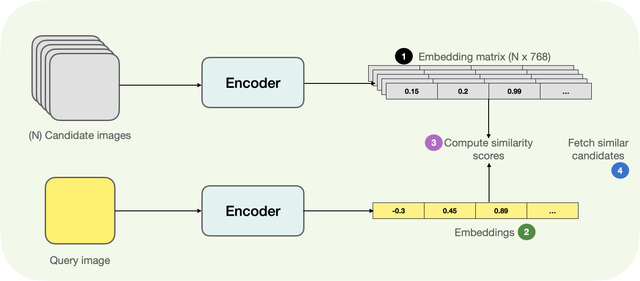

In [1]:
!pip install transformers datasets -q 

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

## load model for embbeding

In [1]:
import torch

In [2]:
from transformers import AutoFeatureExtractor, AutoModel

model_ckpt = "supachaisupanya/swinv2-base-patch4-window16-256_drawing"
extractor = AutoFeatureExtractor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)
hidden_dim = model.config.hidden_size

D:\anaconda\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [3]:
import torchvision.transforms as T


# Data transformation chain.
transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize(int((256 / 224) * extractor.size["height"])),
        T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [4]:
import torch
import torchvision.transforms as T
from PIL import Image

def preprocess_image(image_path, transformation_chain):
    """
    Preprocesses the input image.
    
    Args:
        image_path (str): Path to the input image.
        transformation_chain (torchvision.transforms.Compose): Transformation chain for preprocessing.
        
    Returns:
        torch.Tensor: Preprocessed image tensor.
    """
    image = Image.open(image_path)
    image_tensor = transformation_chain(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

def extract_embeddings_from_image(image_tensor, model):
    """
    Extracts embeddings from the input image tensor using the provided model.
    
    Args:
        image_tensor (torch.Tensor): Preprocessed image tensor.
        model (torch.nn.Module): Model for extracting embeddings.
        
    Returns:
        torch.Tensor: Embeddings tensor.
    """
    device = next(model.parameters()).device  # Get device of the model
    with torch.no_grad():
        embeddings = model(image_tensor.to(device)).last_hidden_state[:, 0].cpu()
    return embeddings

# Example usage:
image1_path = "./minitrain/00000000/0.png"
image1_tensor = preprocess_image(image1_path, transformation_chain)
embeddings1 = extract_embeddings_from_image(image1_tensor, model)
print(f"emd1 = {embeddings1}")

image2_path = "./minitrain/00000005/0.png"
image2_tensor = preprocess_image(image2_path, transformation_chain)
embeddings2 = extract_embeddings_from_image(image2_tensor, model)
print(f"emd2 = {embeddings2}")
#calculate score
def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two vectors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()
compute_scores(embeddings1,embeddings2)

emd1 = tensor([[ 0.6491, -0.5197, -0.2736,  ..., -0.4500,  2.6684,  0.3992]])
emd2 = tensor([[ 1.6654,  0.7420,  1.7211,  ..., -1.5797,  1.9354,  1.4293]])


[0.10645481199026108]

In [15]:
def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two vectors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()
compute_scores(embeddings1,embeddings2)

[0.10645481199026108]

## tsne

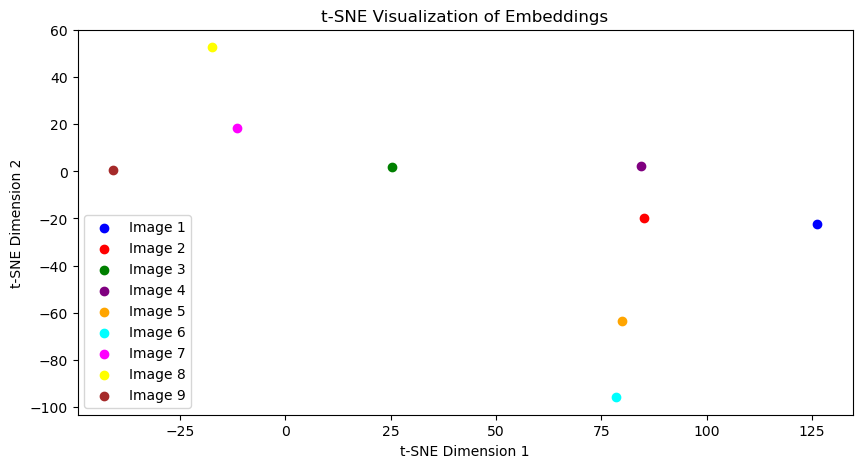

In [30]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image

# Define your model and transformation_chain
# ...

def preprocess_image(image_path, transformation_chain):
    """
    Preprocesses the input image.
    """
    image = Image.open(image_path)
    image_tensor = transformation_chain(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

def extract_embeddings_from_image(image_tensor, model):
    """
    Extracts embeddings from the input image tensor using the provided model.
    """
    device = next(model.parameters()).device  # Get device of the model
    with torch.no_grad():
        embeddings = model(image_tensor.to(device)).last_hidden_state[:, 0].cpu().numpy()
    return embeddings

# Example usage:
image_paths = [ "./minitrain/00000000/0.png",
    "./minitrain/00000000/1.png",
    "./minitrain/00000000/2.png",
    "./minitrain/00000000/3.png",
    "./minitrain/00000000/00000000_f.png",
    "./minitrain/00000000/00000000_r.png",
    "./minitrain/00000000/00000000_t.png",
    "./minitrain/00000002/0.png",
    "./minitrain/00000005/0.png",]

# Preprocess images and extract embeddings
embeddings_list = []
for image_path in image_paths:
    image_tensor = preprocess_image(image_path, transformation_chain)
    embeddings = extract_embeddings_from_image(image_tensor, model)
    embeddings_list.append(embeddings)

# Concatenate the embeddings
combined_embeddings = np.vstack(embeddings_list)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
embeddings_tsne = tsne.fit_transform(combined_embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 5))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown']
for i in range(len(image_paths)):
    plt.scatter(embeddings_tsne[i, 0], embeddings_tsne[i, 1], color=colors[i], label=f'Image {i+1}')
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.savefig('plot_tsne.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan']